# Exploring and Processing Text Data

- Lowercasing
- Punctuation removal
- Stop words removal
- Text standardization
- Spelling correction
- Tokenization
- Stemming
- Lemmatization
- Exploratory data analysis
- End-to-end processing pipeline

### 1.Converting Text Data to Lowercase

The lower() method converts all uppercase characters in a string into
lowercase characters and returns them.

#### 1.1 Read/create the text data

In [42]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity','Therewould be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','Ilike this book','I want more books like this']

In [43]:
print(text)

['This is introduction to NLP', 'It is likely to be useful,to people ', 'Machine learning is the new electrcity', 'Therewould be less hype around AI and more action goingforward', 'python is the best tool!', 'R is good langauage', 'Ilike this book', 'I want more books like this']


In [45]:
#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
df.head()

,tweet
0,This is introduction to NLP
1,"It is likely to be useful,to people"
2,Machine learning is the new electrcity
3,Therewould be less hype around AI and more act...
4,python is the best tool!


#### 1-2 Execute lower() function on the text data

In [46]:
x = 'Testing'
x2 = x.lower()
print(x2)

testing


In [48]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,tweet
0,this is introduction to nlp
1,"it is likely to be useful,to people"
2,machine learning is the new electrcity
3,therewould be less hype around ai and more act...
4,python is the best tool!


### 2.Removing Punctuation

The simplest way to do this is by using the regex and replace() function in
Python.

In [49]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity',
'There would be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','I like this book','I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1               It is likely to be useful,to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


#### 2-1 Execute below function on the text data

In regular expressions, the pattern `[^\w\s]` is used to match any character that is not a word character or whitespace character. Here's what each part of the pattern means:

1. `[]`: Square brackets denote a character class in regular expressions. It specifies a set of characters that you want to match.
2. `^`: The caret symbol inside the character class negates the character class. It means that you want to match any character that is NOT in the specified character class.
3. `\w`: The `\w` is a shorthand character class that matches any word character. Word characters include alphanumeric characters (a-z, A-Z, 0-9) and the underscore `_`.
4. `\s`: The `\s` is a shorthand character class that matches any whitespace character, including spaces, tabs, and newlines.

So, `[^\w\s]` matches any character that is not a word character or whitespace character.

For example:
- The pattern `[^\w\s]` will match characters like `!`, `@`, `$`, `#`, etc. because they are not word characters and not whitespace characters.
- The pattern `[^\w\s]` will not match alphabetic characters, digits, or underscores because they are word characters, and it will not match spaces or tabs because they are whitespace characters.



In [50]:
import re
s = "I. like. This book!"
s1 = re.sub(r'[^\w\s]',"",s)

In [51]:
s1

'I like This book'

In [53]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]',"")
df.head()

<ipython-input-53-30e93bc2ad0a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[^\w\s]',"")


,tweet
0,This is introduction to NLP
1,It is likely to be usefulto people
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool


In [54]:
import string
s = "I. like. This book!"
for c in string.punctuation:
    s= s.replace(c,"")

In [55]:
print(s)

I like This book


### 3. Removing Stop Words

The simplest way to do this by using the NLTK library, or you can build
your own stop words file.

In [56]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity',
'There would be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','I likethis book','I want more books like this']

In [57]:
#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1               It is likely to be useful,to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                    I likethis book
7                        I want more books like this


In [58]:
import nltk
from nltk.corpus import stopwords

In [59]:
#remove stop words
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [67]:
type(stop)

list

In [69]:
df.head()

,tweet
0,This introduction NLP
1,"It likely useful,to people"
2,Machine learning new electrcity
3,There would less hype around AI action goingfo...
4,python best tool!


### 4.Standardizing Text

Most of the text data is in the form of either customer reviews, blogs, or tweets,
where there is a high chance of people using short words and abbreviations to
represent the same meaning. This may help the downstream process to easily
understand and resolve the semantics of the text

### 4.1 Create a custom lookup dictionary

In [ ]:
lookup_dict = {'nlp':'natural language processing','ur':'your', "wbu" : "what about you"}

In [70]:
print(lookup_dict)
import re

{'nlp': 'natural language processing', 'ur': 'your', 'wbu': 'what about you'}


### 4.2 Create a custom function for text standardization

In [71]:
def text_std(input_text, lookup_dict):
    words = input_text.split()
    new_words = []
    
    for word in words:
        # Remove any non-word and non-space characters from the word
        word = re.sub(r'[^\w\s]', "", word)
        
        if word.lower() in lookup_dict:
            # If the lowercase version of the word is found in the lookup_dict,
            # replace it with the corresponding value from the dictionary
            word = lookup_dict[word.lower()]
            
        new_words.append(word)
    
    new_text = " ".join(new_words)
    return new_text

#### 4-3 Run the text_std function

In [72]:
text_std("I like nlp it's ur choice",lookup_dict)

'I like natural language processing its your choice'

### 5. Correcting Spelling

The simplest way to do this by using the TextBlob library.

#### 5-1 Read/create the text data

In [83]:
text=['Introduction to NLP','It is likely to be useful, topeople ','Machinelerning is the new electrcity', 'R is god langauage','I like this book','I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                  tweet
0                   Introduction to NLP
1  It is likely to be useful, topeople 
2  Machinelerning is the new electrcity
3                    R is god langauage
4                      I like this book
5           I want more books like this


#### 5-2 Execute below code on the text data

In [74]:
#Install textblob library
!pip install textblob

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [75]:
from textblob import TextBlob

In [84]:
df['tweet'].apply(lambda x: str(TextBlob(x).correct()))

0                      Introduction to NLP
1       It is likely to be useful, people 
2    Machinelerning is the new electricity
3                        R is god language
4                         I like this book
5              I want more books like this
Name: tweet, dtype: object

In [ ]:
#You can also use autocorrect library as shown below
#install autocorrect
!pip install autocorrect


In [85]:
!pip install pyspellchecker

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [86]:
from spellchecker import SpellChecker

# Create a SpellChecker object
spell = SpellChecker()


In [92]:
word = 'Macine'  # Misspelled word

# Perform autocorrection
corrected_word = spell.correction(word)
print(corrected_word)

machine


### 6. Tokenizing Text

Tokenization refers to
splitting text into minimal meaningful units. There is a sentence tokenizer
and word tokenizer. We will see a word tokenizer in this recipe, which is
a mandatory step in text preprocessing for any kind of analysis. There are
many libraries to perform tokenization like NLTK, SpaCy, and TextBlob.
Here are a few ways to achieve it.

In [93]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity','There would be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','I like this book','I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1               It is likely to be useful,to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


#### 6-1 Execute below code on the text data

In [94]:
!pip install Textblob

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [95]:
from textblob import TextBlob
TextBlob(df['tweet'][3]).words

WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'goingforward'])

In [96]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jothiramsanjeevi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [97]:
#using NLTK
import nltk
#create data
mystring = "My favorite animal is cat"
nltk.word_tokenize(mystring)

['My', 'favorite', 'animal', 'is', 'cat']

### 7. Stemming

In Natural Language Processing (NLP), stemming is the process of reducing a word to its base or root form, known as the stem. The stem represents the core meaning of a word, and by reducing words to their stems, we can group together words that have the same or similar meanings.

The purpose of stemming is to normalize words so that variations of the same word are treated as a single entity during text analysis. It helps in reducing the vocabulary size and achieving better results in tasks such as information retrieval, text classification, and sentiment analysis.

In [98]:
text=['I like fishing','I eat fish','There are many fishes in pound']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound


#### 7-1 Stemming the text

In [99]:
#Import library
from nltk.stem import PorterStemmer

In [101]:
df['tweet']

0                    I like fishing
1                        I eat fish
2    There are many fishes in pound
Name: tweet, dtype: object

In [102]:
st = PorterStemmer()
df['tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                     i like fish
1                      i eat fish
2    there are mani fish in pound
Name: tweet, dtype: object

### 8. Lemmatizing

Lemmatization is the process of reducing words to their base or dictionary form, known as the lemma. Unlike stemming, which truncates words to their root form using heuristics, lemmatization considers the morphological analysis of words to generate the lemma.

The goal of lemmatization is to transform words into a canonical or normalized form, allowing different inflected forms of a word to be treated as a single term. This helps in tasks such as information retrieval, text analysis, and language understanding, where it is desirable to reduce words to their essential meaning.

The part of speech of a word is determined in lemmatization. It will
return the dictionary form of a word, which must be a valid word while
stemming just extracts the root word.
- Lemmatization handles matching “car” to “cars” along with matching “car” to “automobile.”
- Stemming handles matching “car” to “cars.”
Lemmatization can get better results.
- The stemmed form of leafs is leaf.
- The stemmed form of leaves is leav.
- The lemmatized form of leafs is leaf.
- The lemmatized form of leaves is leaf

### 8.1 Lemmatizing the data

In [103]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jothiramsanjeevi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Example words for lemmatization
words = ["running", "runs", "ran", "runner", "runningly"]

# Lemmatize the words
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

# Print the lemmatized words
for word, lemmatized_word in zip(words, lemmatized_words):
    print(f"{word} => {lemmatized_word}")


running => running
runs => run
ran => ran
runner => runner
runningly => runningly


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jothiramsanjeevi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## |9. Exploring Text Data

### 9-1 Read the text data

In [105]:
#Importing data
import nltk
from nltk.corpus import webtext
nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to
[nltk_data]     /Users/jothiramsanjeevi/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


### 9-2 Import necessary libraries

In [107]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

### 9-3 Check number of words in the data

In [108]:
print(len(wt_sentences))
print(len(wt_words))

1142
102457


In [109]:
print((wt_sentences))
print((wt_words))

[['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.'], ['[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.'], ...]
['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]


### 9-4 Compute the frequency of all words in the reviews

In [110]:
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [112]:
sorted_frequency_dist =sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=False)
sorted_frequency_dist[0:5]

['N', 'So', 'Cocoa', 'tinderboxen', 'tearing']

### 9-5 Consider words with length greater than 3 and plot

In [113]:
large_words=dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])

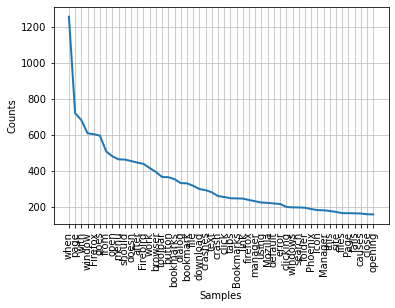

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [114]:
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

### 9-6 Build Wordcloud

In [115]:
#install library
!pip install wordcloud

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


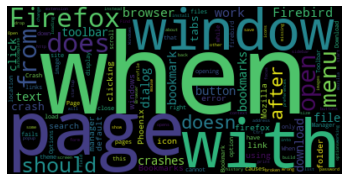

In [116]:
from wordcloud import WordCloud


# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequency_dist)
# Display the word cloud using matplotlib
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()
plt.show()



In [ ]:
pip install --upgrade Pillow

## 10. Building a Text Preprocessing Pipeline

In [ ]:
tweet_sample= "How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.#Best advice for #family #financial #success (@PrepareToWin)"

### 10-1 Process the text

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.tokenize import word_tokenize

def processRow(row):
    # Convert the input row to lowercase
    tweet = row.lower()

    # Removes unicode strings like "\u002c" and "x96"
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)', '', tweet)
    tweet = re.sub(r'[^\x00-\x7f]', '', tweet)

    # Convert any url to 'URL'
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)

    # Convert any @Username to 'AT_USER'
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet)

    # Remove additional white spaces and newlines
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)

    # Remove not alphanumeric symbols and white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)

    # Remove hashtags in front of a word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # Replace multiple exclamation, question marks, and dots with a single one
    tweet = re.sub(r'(\!)\1+', '!', tweet)
    tweet = re.sub(r'(\?)\1+', '?', tweet)
    tweet = re.sub(r'(\.)\1+', '.', tweet)

    # Remove emoticons from text
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', "", tweet)

    # Tokenize the tweet into individual words
    words = word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    words = [Word(word).lemmatize() for word in words]

    # Stem the words
    st = PorterStemmer()
    words = [st.stem(word) for word in words]

    # Join the processed words back into a single text string
    processed_text = " ".join(words)

    return processed_text


In [117]:
#call the function with your data
processRow(tweet_sample)

'take control debt url advic famili financi success at_us'

In [118]:
tweet1= "Disneyland Paris (@DisneylandParis) is the first brand in France to use the new 360 video format, allowing 360-degree videos to be uploaded and viewed directly on its timeline.To get the most out of 360-degree videos, move to the middle of the image and, if on a mobile device, use your finger, or on a desktop, click and drag with the cursor."

In [119]:
processRow(tweet1)

'disneyland pari at_us first brand franc use new 360 video format allow 360 degre video upload view directli timelin get 360 degre video move middl imag mobil devic use finger desktop click drag cursor'